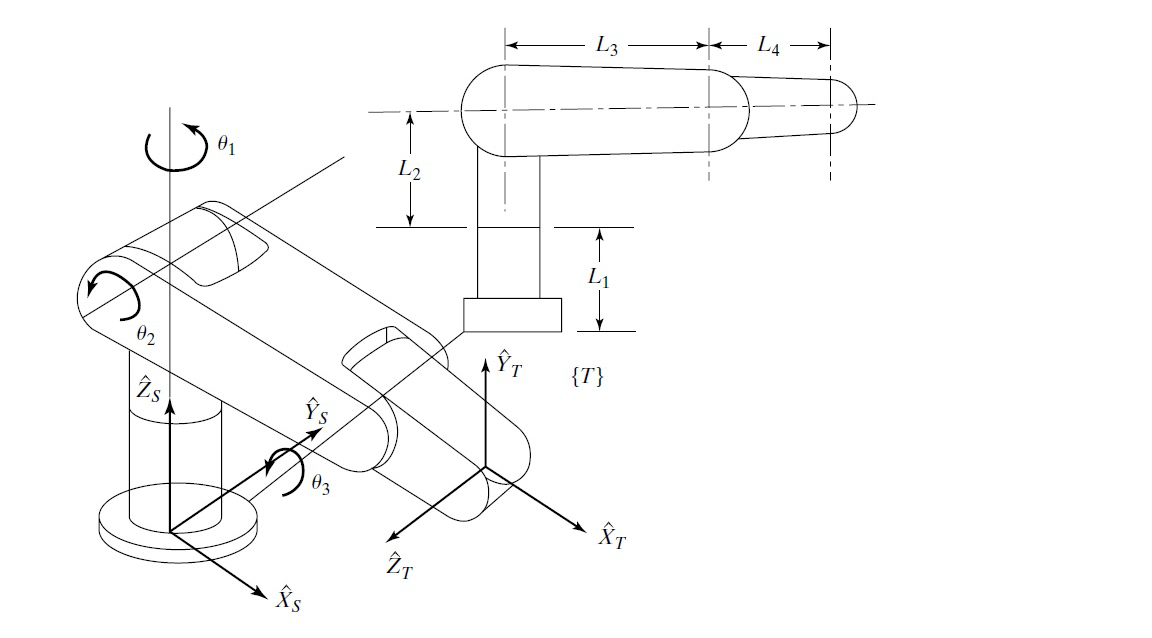


Assignment 1: Iterative Velocity Analysis

Assignment 3: Computation of Jacobian and workspace

DH Parameters
<img  style="transform: rotate(0deg)" src='Assign_123_DH_param.jpg' width="100%"  />

## Assignment of $i$ frame and $\bar{i}$ frame for each of the links is as depicted in the figure above. The DH parameters are also shown in the same figure.

In [2]:
# Created by Dr. Sangamesh Deepak R to teach Robotics online during covid 19 outbreak

import sympy as sy
import numpy as np
sy.init_printing()

In [3]:
# Link parameters
a0 = 0
a1 = 0
a2 = sy.Symbol(r'L_3')

alpha0 = 0
alpha1 = -sy.pi/2
alpha2 = 0



In [4]:
# Joint parameters

theta1 = sy.Symbol(r'\theta_1')
theta2 = sy.Symbol(r'\theta_2')
theta3 = sy.Symbol(r'\theta_3')

d1 = sy.Symbol(r'L_1') + sy.Symbol(r'L_2')
d2 = 0
d3 = 0


In [5]:
# transformation from of i' frame with respect to i frame

def link_transform(a_i, alpha_i):
    Link_T = sy.Matrix([[1, 0, 0, a_i], [0, sy.cos(alpha_i), -sy.sin(alpha_i), 0], [0, sy.sin(alpha_i), sy.cos(alpha_i), 0], \
                   [0,0,0,1] ])
    return Link_T

In [6]:
# transformation of i frame with respect to (i-1)' frame'
def joint_transform(d_i, theta_i):
    Joint_T = sy.Matrix([[sy.cos(theta_i),  -sy.sin(theta_i), 0, 0], 
                        [sy.sin(theta_i),  sy.cos(theta_i), 0, 0], 
                        [0, 0, 1, d_i],
                        [0,0,0,1] ])
    return Joint_T


In [7]:
# Computation of transformation matricies of different link frames with respect to the ground frame
T_0 = sy.Identity(4)
T_0_1 = sy.trigsimp( link_transform(a0, alpha0)*joint_transform(d1, theta1))


T_1_2 = sy.trigsimp( link_transform(a1, alpha1)*joint_transform(d2, theta2) )
T_0_2 = sy.trigsimp( T_0_1* T_1_2); 

T_2_3 = sy.trigsimp(link_transform(a2, alpha2)*joint_transform(d3, theta3) )
T_0_3 = sy.trigsimp( T_0_2* T_2_3); 

T_3_T = link_transform(sy.Symbol(r'L_4'), sy.pi)
T_0_T = sy.trigsimp( T_0_3* T_3_T)

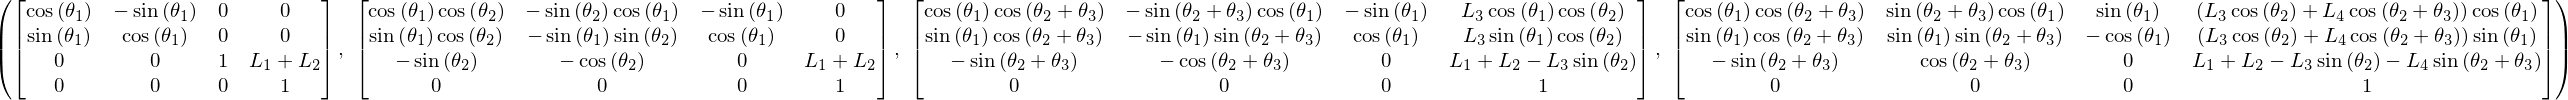

In [8]:
T_0_1, T_0_2, T_0_3, T_0_T # Transformation matricies of first, second, third and fourth bodies

In [9]:
# Extraction of Rotation matrices
R_0_1= T_0_1[0:3,0:3]
R_1_2= T_1_2[0:3,0:3]
R_2_3= T_2_3[0:3,0:3]
R_3_T= T_3_T[0:3,0:3]


r_0_1=T_0_1[0:3,3]
r_1_2=T_1_2[0:3,3]
r_2_3=T_2_3[0:3,3]
r_3_T=T_3_T[0:3,3]


In [10]:
 def cross_product(a,b):
        c=sy.Matrix([
            [a[1,0]*b[2,0]-a[2,0]*b[1,0]],
            [a[2,0]*b[0,0]-a[0,0]*b[2,0]],
            [a[0,0]*b[1,0]-a[1,0]*b[0,0]]
            ])
        return c

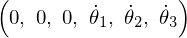

In [11]:
d_d1=0
d_d2=0
d_d3=0

 
d_theta1 = sy.Symbol(r'\dot{\theta}_1')
d_theta2 = sy.Symbol(r'\dot{\theta}_2')
d_theta3 = sy.Symbol(r'\dot{\theta}_3')


d_d1, d_d2, d_d3, d_theta1, d_theta2, d_theta3

In [12]:
omega_0_0 = sy.Matrix([[0],[0],[0]])   
v_0_0 = sy.Matrix([[0],[0],[0]])   


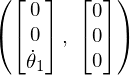

In [13]:
omega_1_1= R_0_1.T*(omega_0_0)+sy.Matrix([[0],[0],[d_theta1] ])

v_1_1 = R_0_1.T*(v_0_0 + cross_product(omega_0_0,r_0_1))+sy.Matrix([[0],[0],[d_d1] ])

omega_1_1, v_1_1

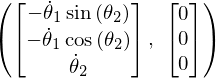

In [14]:
omega_2_2= R_1_2.T*(omega_1_1)+sy.Matrix([[0],[0],[d_theta2] ])

v_2_2 = R_1_2.T*(v_1_1 + cross_product(omega_1_1,r_1_2))+sy.Matrix([[0],[0],[d_d2] ])

omega_2_2, v_2_2

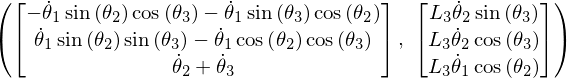

In [15]:
omega_3_3= R_2_3.T*(omega_2_2)+sy.Matrix([[0],[0],[d_theta3] ])

v_3_3 = R_2_3.T*(v_2_2 + cross_product(omega_2_2,r_2_3))+sy.Matrix([[0],[0],[d_d3] ])

omega_3_3, v_3_3

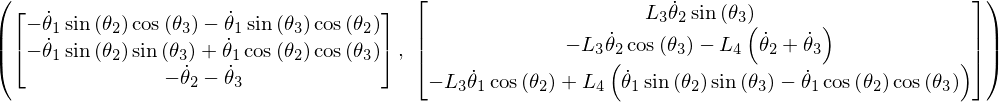

In [16]:
omega_T_T= R_3_T.T*(omega_3_3)
v_T_T = R_3_T.T*(v_3_3 + cross_product(omega_3_3,r_3_T))

omega_T_T, v_T_T

## The required expressions for ${}^{0}\boldsymbol{\omega}_{0}$, ${}^{1}\boldsymbol{\omega}_{1}$, ${}^{2}\boldsymbol{\omega}_{2}$, ${}^{3}\boldsymbol{\omega}_{3}$, ${}^{T}\boldsymbol{\omega}_{T}$, ${}^{0}\boldsymbol{v}_{0}$, ${}^{1}\boldsymbol{v}_{1}$, ${}^{2}\boldsymbol{v}_{2}$, ${}^{3}\boldsymbol{v}_{3}$, ${}^{T}\boldsymbol{v}_{T}$ are as above

In [17]:
R_0_T= T_0_T[0:3,0:3]
v_0_T=sy.trigsimp(R_0_T*v_T_T)  
omega_0_T = sy.trigsimp(R_0_T*omega_T_T)

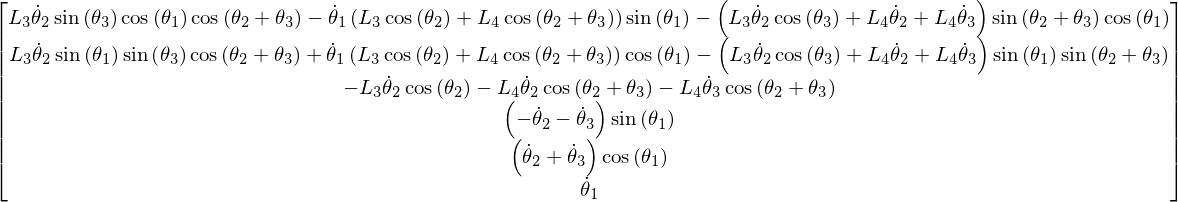

In [18]:
mu_0_T = sy.Matrix([v_0_T, omega_0_T])
mu_0_T

In [19]:

a1= mu_0_T.subs([(d_theta1, 1), (d_theta2,0), (d_theta3, 0)])
a2= mu_0_T.subs([(d_theta1, 0), (d_theta2,1), (d_theta3, 0)])
a3= mu_0_T.subs([(d_theta1, 0), (d_theta2,0), (d_theta3, 1)])


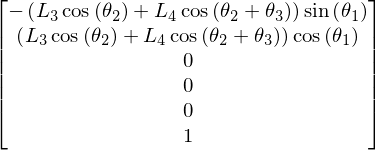

In [20]:
a1

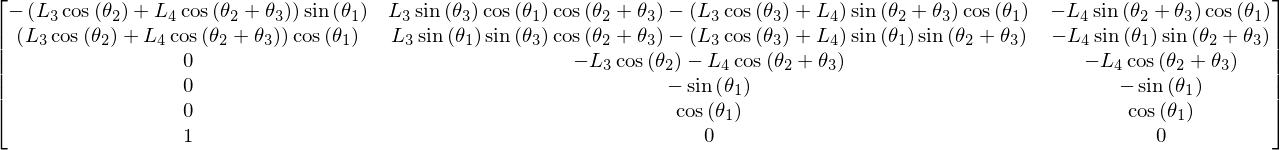

In [21]:
J=a1
J=J.col_insert(1,a2)
J=J.col_insert(2,a3)
J

## The analytical expression for the Jacobian is as found above

## The workspace of the robot when $\theta_1$ is held constant is same as that of 2R robot considered in class as well as in mid-semester examination. When there is no joint limits, the work-space was an annular circular area. When $\theta_1$ is sweeped over $2 \pi$, the annular circular area sweeps an annular SPHERE.

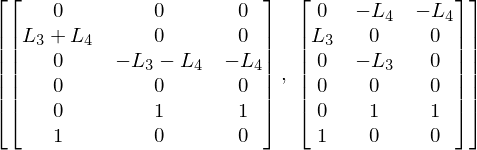

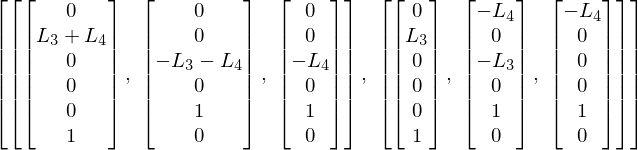

In [22]:
J_num_1 = J.subs([(theta1, 0), (theta2, 0), (theta3, 0)])  # Numerical value of Jacobian at a configuration that lies at the boundary of the workspace
J_num_2 = J.subs([(theta1, 0), (theta2, 0), (theta3, sy.pi/2)]) # Numerical value of Jacobian at configuration that lies in interior of the workspace
display([J_num_1, J_num_2])
display([J_num_1.columnspace(), J_num_2.columnspace()])

## Rank of the Jacobian at both of the two configurations choosen above is three.